Name: Rishika Mishra

PRN: 1032210945

Batch: A2

CV EXPERIMENT 2

In [2]:
import numpy as np
import skimage
from skimage.io import imread
from skimage import io, color, img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt
import imageio
import skimage
import cv2

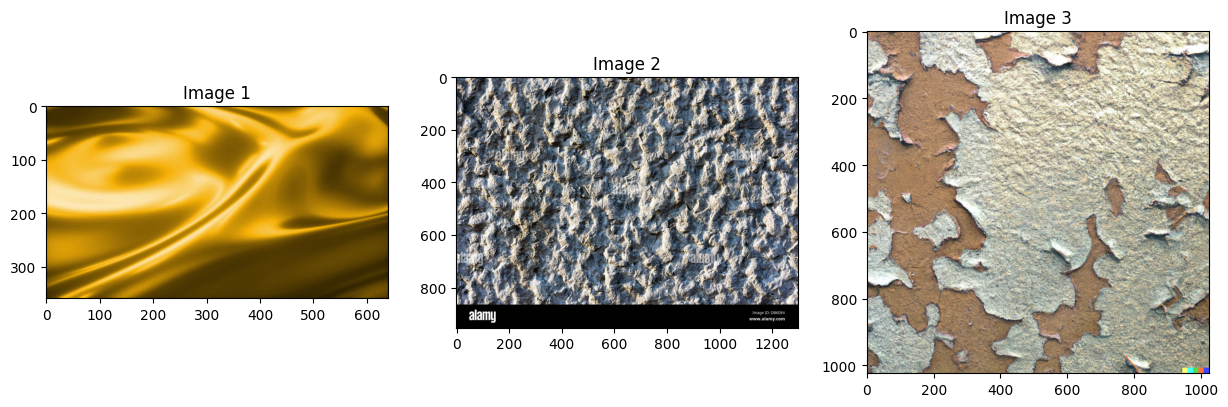

In [3]:
import matplotlib.pyplot as plt
from skimage import io

# Example image paths
image_1_path = 'D:/texture1.jpg'
image_2_path = 'D:/texture2.jpg'
image_3_path = 'D:/texture3.png'

# Display the original images
plt.figure(figsize=(15, 5))

# Image 1
plt.subplot(1, 3, 1)
image_1 = io.imread(image_1_path)
plt.imshow(image_1)
plt.title('Image 1')

# Image 2
plt.subplot(1, 3, 2)
image_2 = io.imread(image_2_path)
plt.imshow(image_2)
plt.title('Image 2')

# Image 3
plt.subplot(1, 3, 3)
image_3 = io.imread(image_3_path)
plt.imshow(image_3)
plt.title('Image 3')

plt.show()


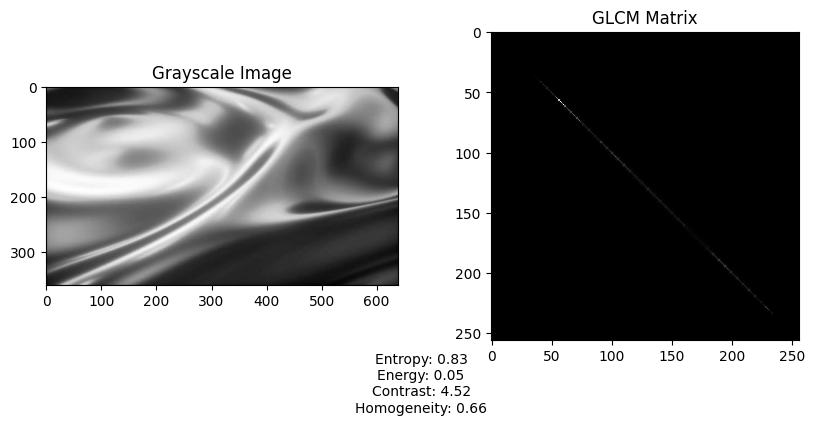

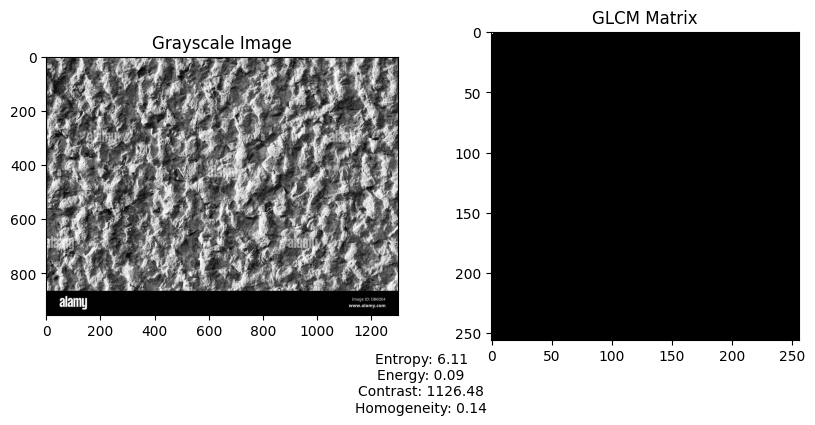

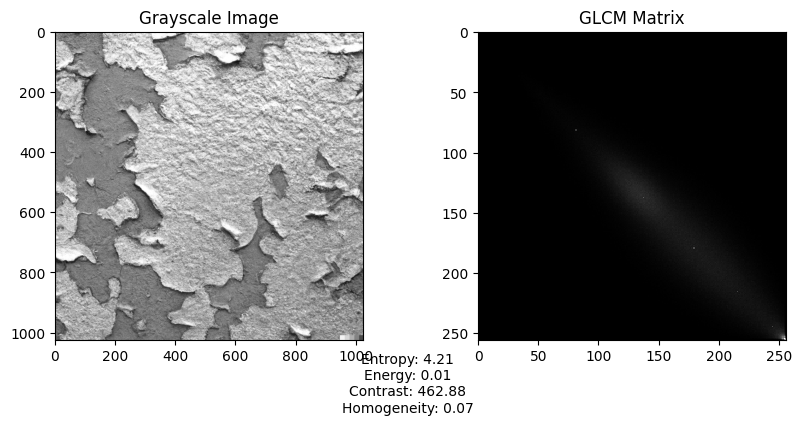

In [4]:
# Function to calculate GLCM properties
def calculate_glcm_properties(glcm):
    properties = {
        'entropy': shannon_entropy(glcm.ravel()),
        'energy': np.mean(graycoprops(glcm, 'energy')),
        'contrast': np.mean(graycoprops(glcm, 'contrast')),
        'homogeneity': np.mean(graycoprops(glcm, 'homogeneity'))
    }
    return properties

# Function to process and plot GLCM matrix
def process_and_plot_glcm(image_path, angle=0):
    # Load the image
    original_image = io.imread(image_path)

    # Convert the image to grayscale
    gray_image = color.rgb2gray(original_image)

    # Convert the float image to unsigned integer type
    gray_image_uint8 = img_as_ubyte(gray_image)

    # Calculate GLCM
    glcm = graycomatrix(gray_image_uint8, [1], [angle], symmetric=True, normed=True)

    # Calculate GLCM properties
    properties = calculate_glcm_properties(glcm)

    # Plot the grayscale image and the GLCM matrix
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')

    plt.subplot(1, 2, 2)
    plt.imshow(np.log1p(glcm[:, :, 0, 0]), cmap='gray', interpolation='nearest')
    plt.title('GLCM Matrix')

    # Display properties below the images
    plt.text(0.5, 0, f'Entropy: {properties["entropy"]:.2f}\nEnergy: {properties["energy"]:.2f}\nContrast: {properties["contrast"]:.2f}\nHomogeneity: {properties["homogeneity"]:.2f}', ha='center', va='center', transform=plt.gcf().transFigure)
    plt.show()

    return properties

image_1_properties = process_and_plot_glcm(image_1_path)
image_2_properties = process_and_plot_glcm(image_2_path)
image_3_properties = process_and_plot_glcm(image_3_path)


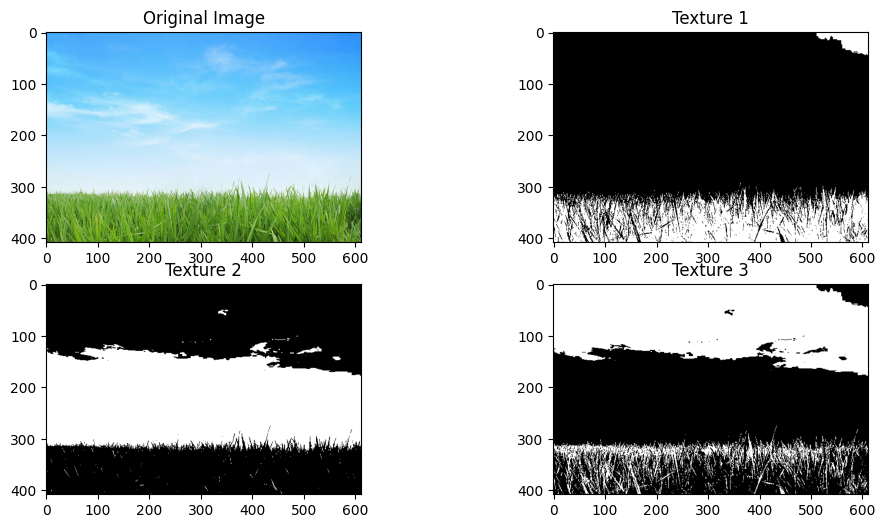

In [5]:
def texture_segmentation(image_path, k=3):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use K-means clustering on the grayscale image
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(gray_image.flatten().reshape(-1, 1).astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape the labels to the shape of the original image
    labels = labels.reshape(image.shape[0], image.shape[1])

    # Create mask for each cluster
    masks = [np.uint8(labels == i) for i in range(k)]

    # Plot the original image and segmented textures
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    for i in range(k):
        plt.subplot(2, 2, i+2)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f'Texture {i+1}')

    plt.show()

# Example usage
image_path = 'D:/image_segmentation.jpeg'
texture_segmentation(image_path, k=3)
